In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [2]:
# 파일 불러오기
with open('../../data/ba_chatgpt_df.pkl', 'rb') as f:
    df = pickle.load(f)


In [3]:
# 파일 불러오기
with open('../../data/df_not_answered.pkl', 'rb') as f:
    df_not_answered = pickle.load(f)
    


In [4]:
# 파일 불러오기
with open('../../data/df_answer_tag.pkl', 'rb') as f:
    df_answer_tag = pickle.load(f)

In [5]:
# 파일 불러오기
with open('../../data/df_vote.pkl', 'rb') as f:
    df_vote = pickle.load(f)

In [6]:
# 파일 불러오기
with open('../../data/df_date.pkl', 'rb') as f:
    df_date = pickle.load(f)

In [7]:
# 파일 불러오기
with open('../../data/df_score.pkl', 'rb') as f:
    df_score = pickle.load(f)

In [20]:
# 파일 불러오기
with open('../../data/df_norm_viewcnt.pkl', 'rb') as f:
    df_norm_viewcnt = pickle.load(f)

In [8]:
df_for_tot = df.groupby(['qna_creation_date']).sum()[['cnt']]

In [9]:
df_for_tot.head()

,cnt
qna_creation_date,
2013-11-30,9432
2013-12-01,9019
2013-12-02,16923
2013-12-03,18785
2013-12-04,19329


In [10]:
df_for_tot.loc['2022-11-30', :]

cnt    9517
Name: 2022-11-30, dtype: int64

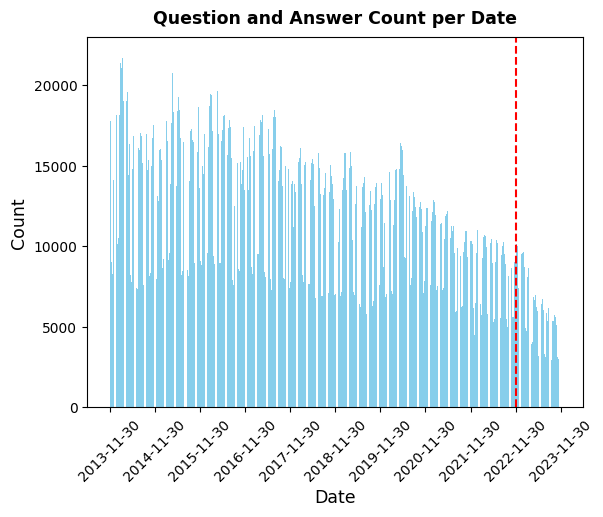

In [57]:
fig, ax = plt.subplots()

ax.bar(df_for_tot.index
    ,  height = df_for_tot['cnt']
    ,  color = 'skyblue'
    # ,  edgecolor = 'black'
      ) # hist type

ax.set_title("Question and Answer Count per Date", # add title
             fontsize = 12.5,
             weight = 'bold',
             pad = 10,
             loc = 'center')
ax.set_xlabel("Date", # add x-axis label
              fontsize = 12.5)
ax.set_ylabel("Count", # add y-axis label
              fontsize = 12.5)

major_xticks = ['2013-11-30','2014-11-30','2015-11-30','2016-11-30','2017-11-30','2018-11-30','2019-11-30','2020-11-30'
                ,'2021-11-30', '2022-11-30', '2023-11-30']
ax.set_xticks(major_xticks)

ax.axvline('2022-11-30', # add vertical line
           color = 'red',
           linestyle = '--',
           linewidth = 1.5)
plt.xticks(rotation=45)
plt.show();

In [12]:
df_for_tot[df_for_tot.index>='2020-11-30']

,cnt
qna_creation_date,
2020-11-30,11225
2020-12-01,12120
2020-12-02,12314
2020-12-03,12806
2020-12-04,11651
...,...
2023-11-25,3223
2023-11-26,3333
2023-11-27,5802


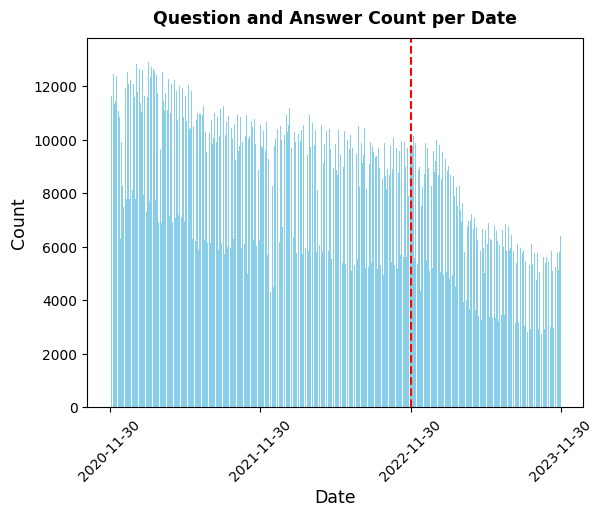

In [13]:
fig, ax = plt.subplots()

ax.bar(df_for_tot[df_for_tot.index>='2020-11-30'].index
    ,  height = df_for_tot[df_for_tot.index>='2020-11-30']['cnt']
    ,  color = 'skyblue'
    # ,  edgecolor = 'black'
      ) # hist type

ax.set_title("Question and Answer Count per Date", # add title
             fontsize = 12.5,
             weight = 'bold',
             pad = 10,
             loc = 'center')
ax.set_xlabel("Date", # add x-axis label
              fontsize = 12.5)
ax.set_ylabel("Count", # add y-axis label
              fontsize = 12.5)

major_xticks = ['2020-11-30', '2021-11-30', '2022-11-30', '2023-11-30']
ax.set_xticks(major_xticks)

ax.axvline('2022-11-30', # add vertical line
           color = 'red',
           linestyle = '--',
           linewidth = 1.5)
plt.xticks(rotation=45)
plt.show();

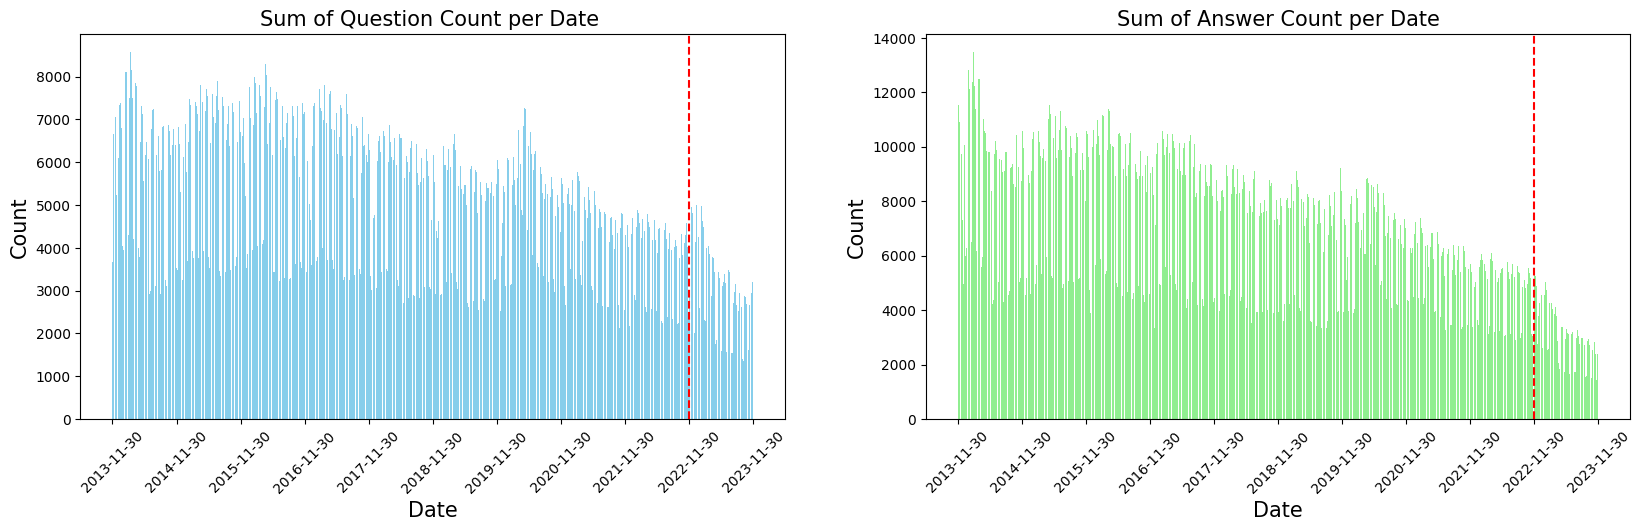

In [67]:
### create a figure with multiple subplots

fig, axs = plt.subplots(1, 2, figsize = (20, 5))
# plt.xticks(rotation=45)
major_xticks = ['2013-11-30','2014-11-30','2015-11-30','2016-11-30','2017-11-30','2018-11-30','2019-11-30','2020-11-30'
                ,'2021-11-30', '2022-11-30', '2023-11-30']

axs[0].bar(df.loc[df['posttypeid']=='1', 'qna_creation_date']
        ,  df.loc[df['posttypeid']=='1', 'cnt']
        ,  color = 'skyblue'
        # ,  edgecolor = 'black'
      ) # hist type
axs[0].set_title('Sum of Question Count per Date ', fontsize = 15)
axs[0].set_xlabel('Date', fontsize = 15)
axs[0].set_ylabel('Count', fontsize = 15)
axs[0].set_xticks(major_xticks)
axs[0].axvline(major_xticks[-2], # add vertical line
           color = 'red',
           linestyle = '--',
           linewidth = 1.5)
axs[0].tick_params(axis='x', rotation=45)

axs[1].bar(df.loc[df['posttypeid']=='2', 'qna_creation_date']
        ,  df.loc[df['posttypeid']=='2', 'cnt']
        ,  color = 'lightgreen'
        # ,  edgecolor = 'black'
      ) # hist type
axs[1].set_title('Sum of Answer Count per Date', fontsize = 15)
axs[1].set_xlabel('Date', fontsize = 15)
axs[1].set_ylabel('Count', fontsize = 15)
axs[1].set_xticks(major_xticks)
axs[1].axvline(major_xticks[-2], # add vertical line
           color = 'red',
           linestyle = '--',
           linewidth = 1.5)
axs[1].tick_params(axis='x', rotation=45)


plt.show();

In [15]:
df_for_tot_rset = df_for_tot.reset_index()

In [16]:
df_for_tot_rset['weekday_nm'] = pd.to_datetime(df_for_tot_rset['qna_creation_date']).dt.day_name()
df_for_tot_rset['weekday'] = pd.to_datetime(df_for_tot_rset['qna_creation_date']).dt.weekday

In [17]:
df_for_tot_rset

,qna_creation_date,cnt,weekday_nm,weekday
0,2013-11-30,9432,Saturday,5
1,2013-12-01,9019,Sunday,6
2,2013-12-02,16923,Monday,0
3,2013-12-03,18785,Tuesday,1
4,2013-12-04,19329,Wednesday,2
...,...,...,...,...
3647,2023-11-25,3223,Saturday,5
3648,2023-11-26,3333,Sunday,6
3649,2023-11-27,5802,Monday,0
3650,2023-11-28,6225,Tuesday,1


In [18]:
df_weekday_mean = df_for_tot_rset.groupby(['weekday_nm', 'weekday']).mean([['cnt']]).reset_index()

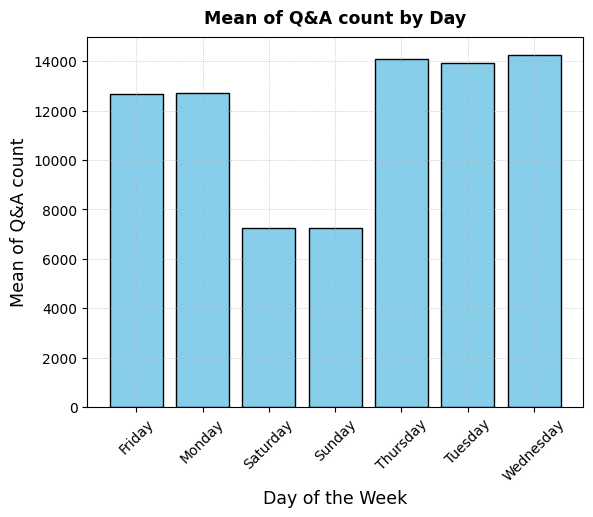

In [19]:
fig, ax = plt.subplots()

ax.bar(df_weekday_mean.weekday_nm
    ,  height = df_weekday_mean['cnt']
    ,  color = 'skyblue'
    ,  edgecolor = 'black'
      ) # hist type

ax.set_title("Mean of Q&A count by Day", # add title
             fontsize = 12.5,
             weight = 'bold',
             pad = 10,
             loc = 'center')
ax.set_xlabel("Day of the Week", # add x-axis label
              fontsize = 12.5)
ax.set_ylabel("Mean of Q&A count", # add y-axis label
              fontsize = 12.5)

label_list = list(df_weekday_mean['weekday_nm'])
tick_values = np.arange(len(label_list))
ax.set_xticks(ticks = tick_values ,labels = label_list, rotation =45)


# fig.text(0.7, 0.76, color = 'red', fontsize = 12.5,  s='Mean: ' + str(round(np.mean(viewcount_df['ViewCount_question']), 2))) #
# fig.text(0.41, 0.77, s='pct_change: ' + str(decrease_2122)) #
# fig.text(0.66, 0.65, s='pct_change: ' + str(decrease_2223)) #

ax.grid(True, linestyle = ':', linewidth = 0.5) # add grid

plt.show();

In [20]:
df_not_answered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5223203 entries, 0 to 5223202
Data columns (total 3 columns):
 #   Column          Dtype         
---  ------          -----         
 0   q_id            int64         
 1   q_creationdate  datetime64[ns]
 2   a_id            float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 119.5 MB


In [21]:
df_not_answeredviz = df_not_answered[['q_id', 'q_creationdate', 'a_id']]

In [22]:
df_not_answeredviz['dt'] = pd.to_datetime(df_not_answeredviz['q_creationdate']).dt.date
df_not_answeredviz['dt'] = df_not_answeredviz['dt'].astype('str')

In [23]:
df_tot_q = df_not_answeredviz.groupby('dt').count()[['q_id']].reset_index()

In [24]:
df_not_a = df_not_answeredviz[df_not_answeredviz['a_id'].isna()].groupby('dt').count()[['q_id']].reset_index()

In [25]:
df_totq_nota = pd.merge(df_tot_q, df_not_a, on ='dt', how='left')

In [26]:
df_totq_nota.columns = ['dt', 'totq', 'nota']

In [27]:
df_totq_nota['nota_rate'] = np.round(df_totq_nota['nota']/df_totq_nota['totq']*100, 3)
df_totq_nota['a_rate'] = 100- df_totq_nota['nota_rate']

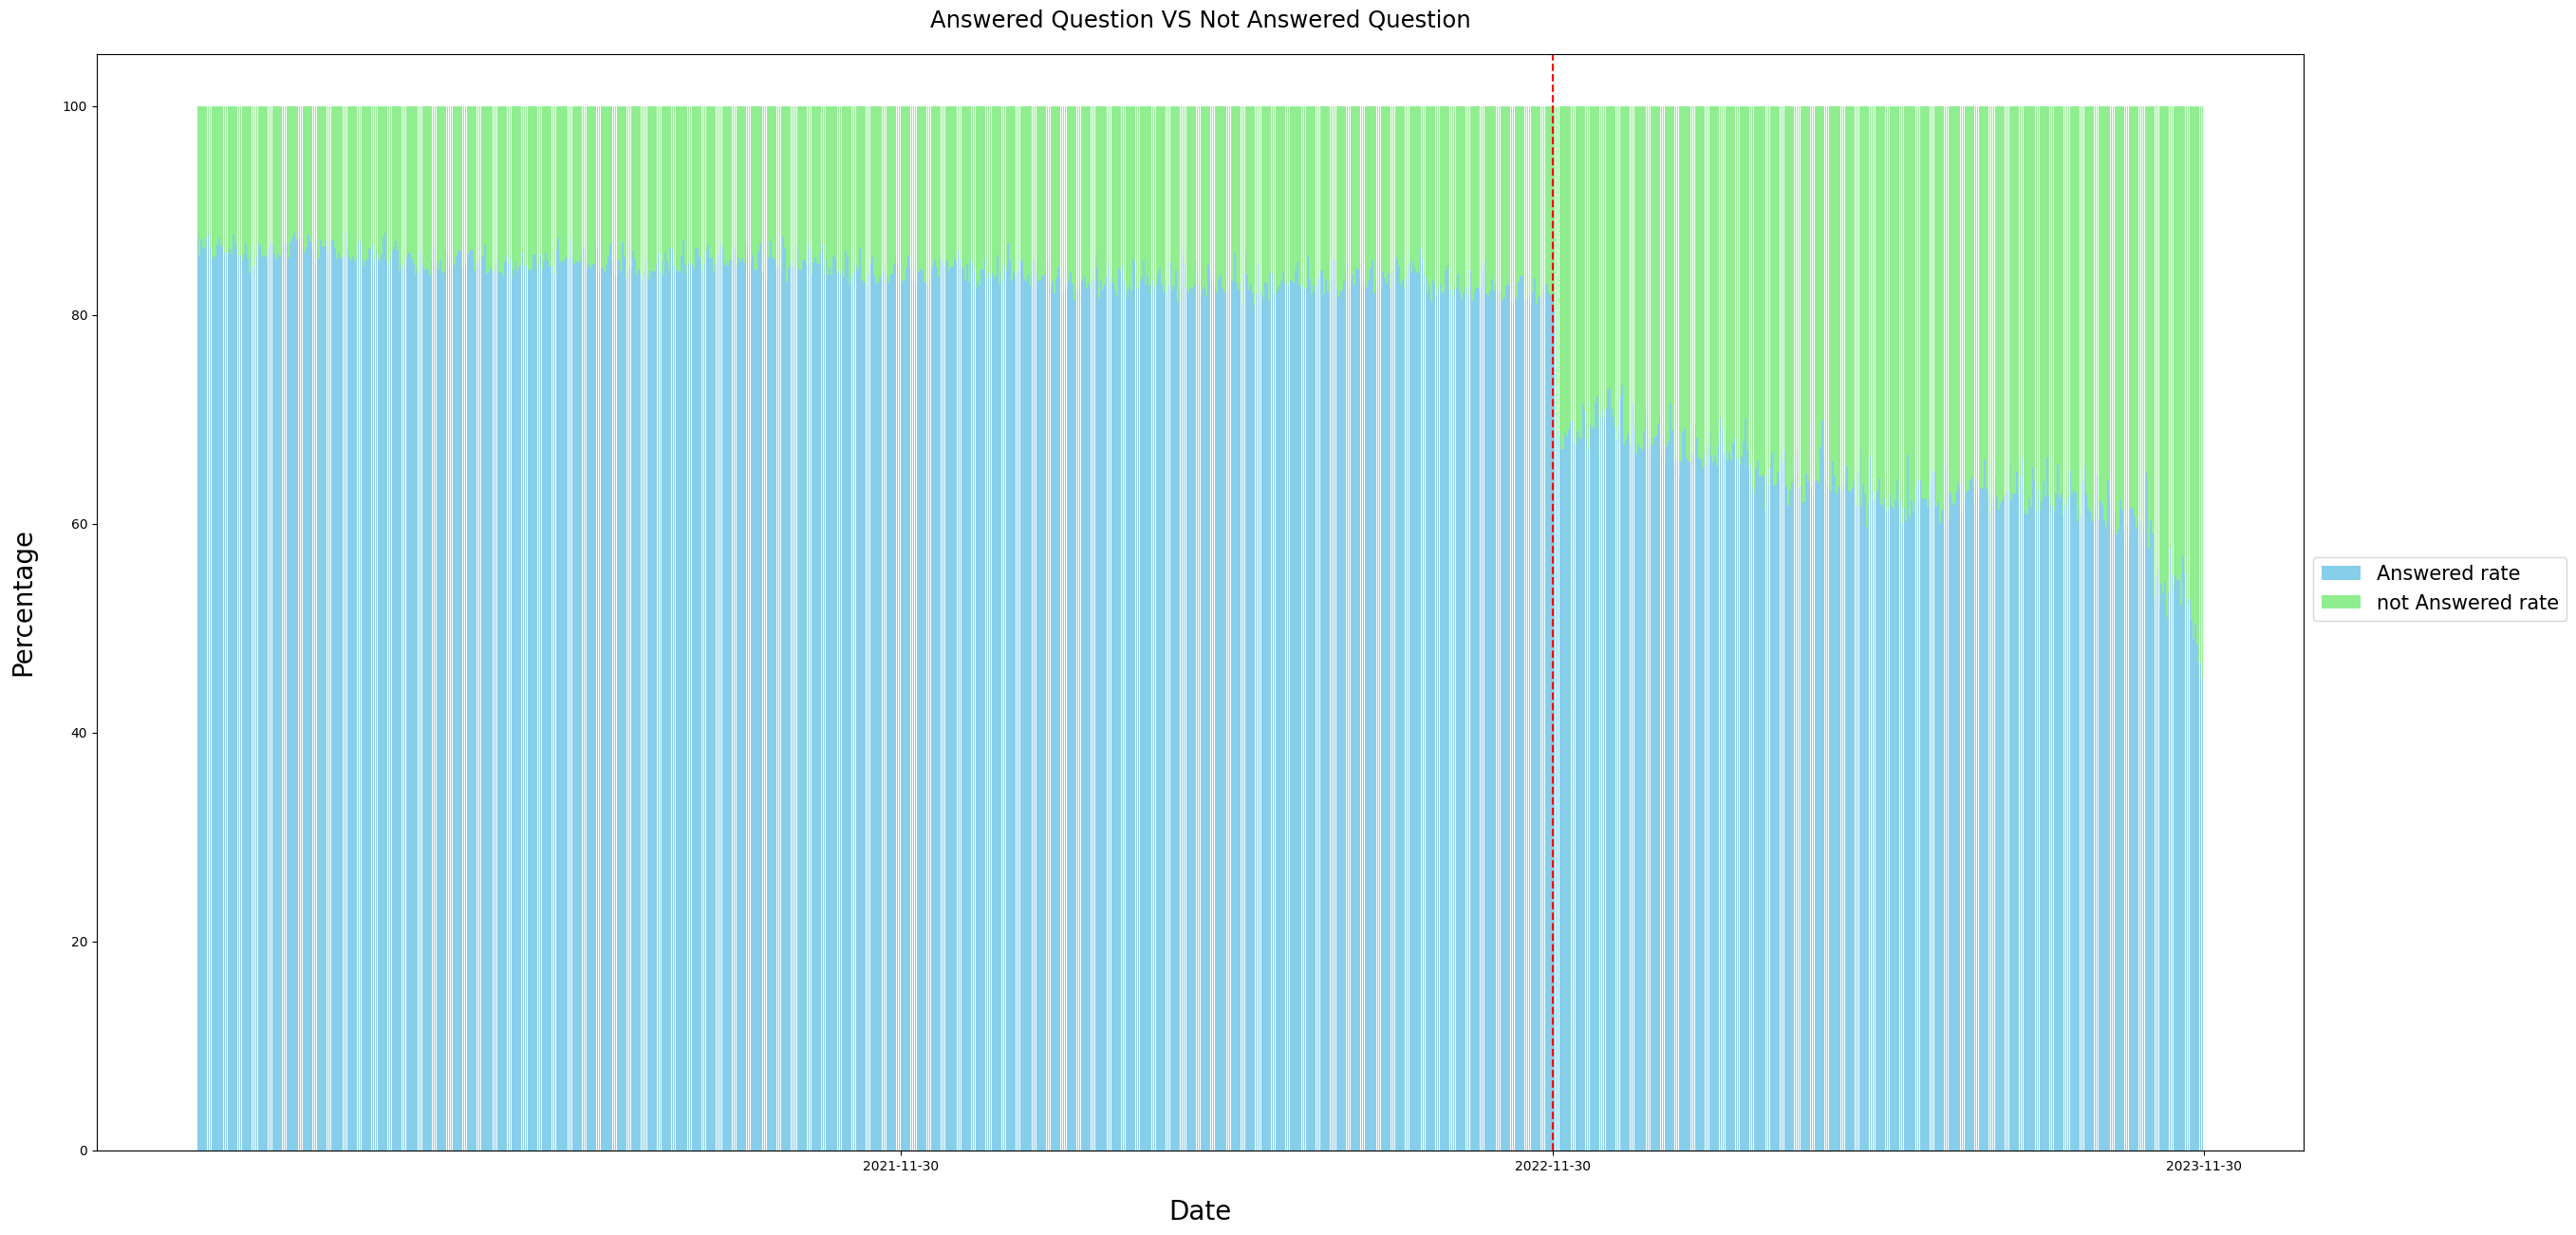

In [28]:
fig, ax = plt.subplots(figsize = (30, 15))

ax.bar(df_totq_nota['dt'], df_totq_nota['a_rate'], color='skyblue', label = 'Answered rate')
ax.bar(df_totq_nota['dt'], df_totq_nota['nota_rate'], bottom = df_totq_nota['a_rate'], color = 'lightgreen', label = 'not Answered rate')

ax.set_xlabel('Date', fontsize = 20, labelpad = 20)
ax.set_ylabel('Percentage', fontsize = 20, labelpad = 20)
ax.set_title('Answered Question VS Not Answered Question', fontsize = 17.5, pad = 20)
ax.set_xticks(major_xticks)
# ax.tick_params(axis = 'both', labelsize = 17.5)

ax.legend( title_fontsize = 15, fontsize = 15,
          bbox_to_anchor = (1, 0.55))


ax.axvline('2022-11-30', # add vertical line
           color = 'red',
           linestyle = '--',
           linewidth = 1.5)

In [29]:
df_pivot = df.pivot_table(index='qna_creation_date', columns='posttypeid', values = 'cnt').reset_index()

In [30]:
df_pivot['q_over_a']=(df_pivot['2']/df_pivot['1'])*100

In [31]:
df_pivot.head()

posttypeid,qna_creation_date,1,2,q_over_a
0,2013-11-30,3678.0,5754.0,156.443719
1,2013-12-01,3619.0,5400.0,149.212490
2,2013-12-02,6595.0,10328.0,156.603487
3,2013-12-03,7251.0,11534.0,159.067715
4,2013-12-04,7483.0,11846.0,158.305492


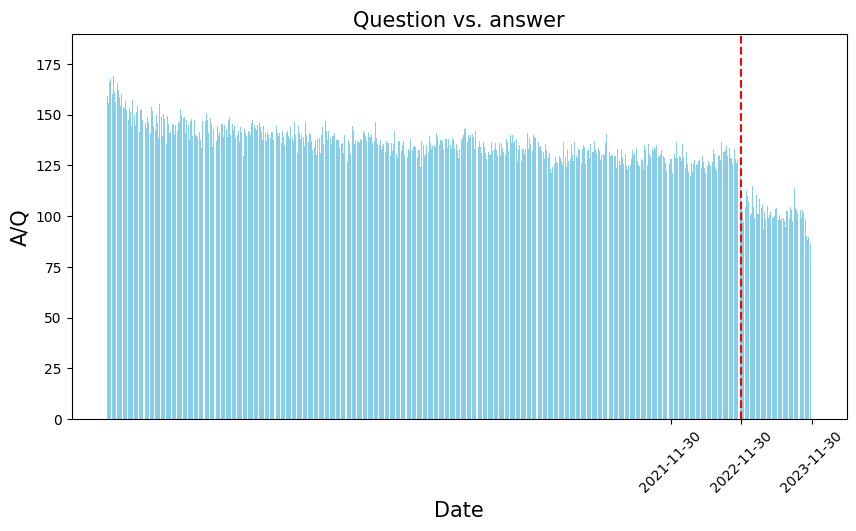

In [32]:
### create a figure with multiple subplots

fig, axs = plt.subplots(figsize = (10, 5))
# plt.xticks(rotation=45)
major_xticks = ['2013-11-30','2014-11-30','2015-11-30','2016-11-30','2017-11-30','2018-11-30','2019-11-30','2020-11-30'
                ,'2021-11-30', '2022-11-30', '2023-11-30']

axs.bar(df_pivot['qna_creation_date']
        ,  df_pivot['q_over_a']
        ,  color = 'skyblue'
        # ,  edgecolor = 'black'
      ) # hist type
axs.set_title('Question vs. answer', fontsize = 15)
axs.set_xlabel('Date', fontsize = 15)
axs.set_ylabel('A/Q', fontsize = 15)
axs.set_xticks(major_xticks)
axs.axvline(major_xticks[1], # add vertical line
           color = 'red',
           linestyle = '--',
           linewidth = 1.5)
axs.tick_params(axis='x', rotation=45)


plt.show();

In [33]:
df_answer_tag['q_tags_list'] = df_answer_tag['q_tags'].str.replace('><', ' ').str.replace('<', '').str.replace('>', '').str.split(' ')


In [34]:
df_answered_cnt = df_not_answered.groupby(['q_creationdate', 'q_id']).count()[['a_id']].reset_index()

In [35]:
df_answered_cnt['date'] = pd.to_datetime(df_answered_cnt['q_creationdate']).dt.date.astype('str')

In [36]:
df_answered_cnt.loc[(df_answered_cnt['date']>= '2020-11-01')&(df_answered_cnt['date']<= '2020-11-30'), 'date'].unique()

array(['2020-11-01', '2020-11-02', '2020-11-03', '2020-11-04',
       '2020-11-05', '2020-11-06', '2020-11-07', '2020-11-08',
       '2020-11-09', '2020-11-10', '2020-11-11', '2020-11-12',
       '2020-11-13', '2020-11-14', '2020-11-15', '2020-11-16',
       '2020-11-17', '2020-11-18', '2020-11-19', '2020-11-20',
       '2020-11-21', '2020-11-22', '2020-11-23', '2020-11-24',
       '2020-11-25', '2020-11-26', '2020-11-27', '2020-11-28',
       '2020-11-29', '2020-11-30'], dtype=object)

In [37]:
df_answered_cnt.loc[(df_answered_cnt['date']>= '2020-11-01')&(df_answered_cnt['date']<= '2020-11-30'), 'a_id'].value_counts()

a_id
1     76331
0     24549
2     23152
3      6038
4      1605
5       485
6       176
7        82
9        35
8        31
10       15
11       14
12        9
14        5
17        4
16        4
15        4
18        3
24        2
13        2
21        2
20        2
29        2
25        1
27        1
41        1
26        1
22        1
42        1
36        1
48        1
23        1
Name: count, dtype: int64

In [38]:
df_answered_cnt.loc[(df_answered_cnt['date']>= '2021-11-01')&(df_answered_cnt['date']<= '2021-11-30'), 'a_id'].value_counts().sort_index()

a_id
0     24866
1     67551
2     19070
3      4720
4      1182
5       388
6       117
7        54
8        29
9        15
10        5
11       11
12        5
13        5
14        5
15        2
16        2
17        1
18        2
19        2
27        1
31        1
Name: count, dtype: int64

In [39]:
df_answered_cnt.loc[(df_answered_cnt['date']>= '2022-11-01')&(df_answered_cnt['date']<= '2022-11-30'), 'a_id'].value_counts()

a_id
1     64272
0     24679
2     16092
3      3542
4       831
5       232
6        75
7        28
8        10
9         3
10        3
11        2
12        1
22        1
14        1
Name: count, dtype: int64

In [40]:
df_answered_cnt.loc[(df_answered_cnt['date']>= '2023-11-01')&(df_answered_cnt['date']<= '2023-11-30'), 'a_id'].value_counts().to_frame()['count']

a_id
0    40040
1    27500
2     5889
3     1126
4      271
5       68
6       19
7        6
9        1
Name: count, dtype: int64

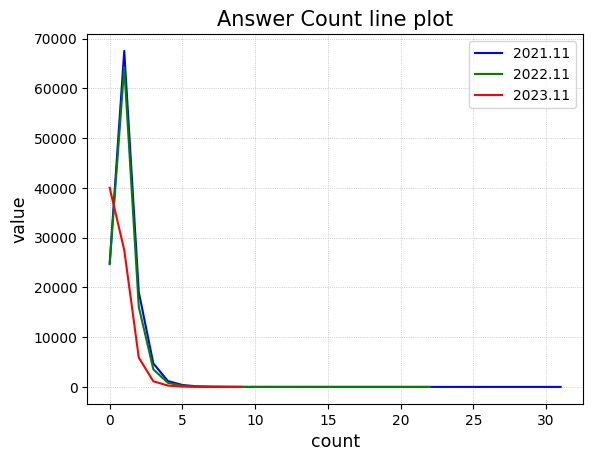

In [41]:
fig, ax = plt.subplots()


ax.plot(df_answered_cnt.loc[(df_answered_cnt['date']>= '2021-11-01')&(df_answered_cnt['date']<= '2021-11-30'), 'a_id'].value_counts().to_frame()['count'].sort_index(), # specify data
        color = 'blue',
        label = '2021.11'
# label = ['question', 'answer']
) # create legened labels

ax.plot(df_answered_cnt.loc[(df_answered_cnt['date']>= '2022-11-01')&(df_answered_cnt['date']<= '2022-11-30'), 'a_id'].value_counts().to_frame()['count'].sort_index(), # specify data
        color = 'green',
         label = '2022.11'
        # label = ['question', 'answer']
        ) # create legened labels

ax.plot(df_answered_cnt.loc[(df_answered_cnt['date']>= '2023-11-01')&(df_answered_cnt['date']<= '2023-11-30'), 'a_id'].value_counts().to_frame()['count'].sort_index(), # specify data
        color = 'red', # bar color
        label = '2023.11'
        ) # create legened labels





ax.set_title('Answer Count line plot', fontsize = 15) # title
ax.set_xlabel('count', fontsize = 12.5) # x-axis label
ax.set_ylabel('value', fontsize = 12.5) # y-axis label

ax.legend(loc = 'upper right', fontsize = 10) # add legend

ax.grid(True, linestyle = ':', linewidth = 0.5) # grid

plt.show();

In [42]:
df_date['year'] = df_date['date'].dt.year
df_date['month'] = df_date['date'].dt.month
df_date['day'] = df_date['date'].dt.day
df_date['date_m'] = df_date['date'].dt.date

In [43]:
df_date = df_date[df_date['year'].isin([2020, 2021, 2022, 2023])]


In [44]:
df_vote['date'] = pd.to_datetime(df_vote['creationdate']).dt.date

In [45]:
df_dv_merge = pd.merge(df_date, df_vote, left_on = 'date_m', right_on = 'date')

In [46]:
df_dv_merge = df_dv_merge.groupby(['year', 'month', 'day']).count()['vote_id'].reset_index()

In [47]:
df_dv_merge = df_dv_merge.groupby(['year', 'month']).mean('vote_id').reset_index()

In [48]:
df_dv_merge['yyyymm'] = df_dv_merge['year'].astype('str') + "-" + df_dv_merge['month'].astype('str')

In [49]:
df_dv_merge[['yyyymm', 'vote_id']]

,yyyymm,vote_id
0,2020-1,23243.548387
1,2020-2,23176.586207
2,2020-3,21563.645161
3,2020-4,25156.933333
4,2020-5,24723.612903
5,2020-6,23875.333333
6,2020-7,22641.677419
7,2020-8,20430.741935
8,2020-9,19765.066667
9,2020-10,19051.000000


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


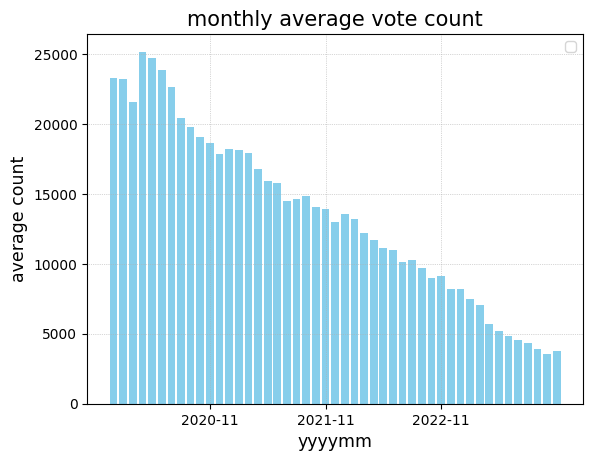

In [50]:
fig, ax = plt.subplots()


ax.bar(df_dv_merge['yyyymm']
        ,  df_dv_merge['vote_id']
        ,  color = 'skyblue'
        # ,  edgecolor = 'black'
      ) # hist type
ax.set_title('monthly average vote count', fontsize = 15) # title
ax.set_xlabel('yyyymm', fontsize = 12.5) # x-axis label
ax.set_ylabel('average count', fontsize = 12.5) # y-axis label
ax.set_xticks(['2020-11', '2021-11', '2022-11'])

ax.legend(loc = 'upper right', fontsize = 10) # add legend

ax.grid(True, linestyle = ':', linewidth = 0.5) # grid

plt.show();

In [51]:
df_score['date'] = pd.to_datetime(df_score['creationdate']).dt.date

In [52]:
df_ds_merge = pd.merge(df_date, df_score, left_on = 'date_m', right_on = 'date')

In [53]:
df_ds_merge = df_ds_merge.groupby(['year', 'month']).mean('score').reset_index()

In [54]:
df_ds_merge

,year,month,day,score
0,2020,1,16.744085,1.501826
1,2020,2,15.247181,1.420324
2,2020,3,16.150988,1.335604
3,2020,4,15.759285,1.297482
4,2020,5,15.844433,1.270296
5,2020,6,15.175876,1.282080
6,2020,7,16.044499,1.270707
7,2020,8,16.024514,1.263364
8,2020,9,15.579394,1.256789
9,2020,10,16.043403,1.260571


In [55]:
df_ds_merge['yyyymm'] = df_ds_merge['year'].astype('str') + "-" + df_dv_merge['month'].astype('str')

In [56]:
df_ds_merge

,year,month,day,score,yyyymm
0,2020,1,16.744085,1.501826,2020-1
1,2020,2,15.247181,1.420324,2020-2
2,2020,3,16.150988,1.335604,2020-3
3,2020,4,15.759285,1.297482,2020-4
4,2020,5,15.844433,1.270296,2020-5
5,2020,6,15.175876,1.282080,2020-6
6,2020,7,16.044499,1.270707,2020-7
7,2020,8,16.024514,1.263364,2020-8
8,2020,9,15.579394,1.256789,2020-9
9,2020,10,16.043403,1.260571,2020-10


In [21]:
df_norm_viewcnt['dt'] = df_norm_viewcnt['creationdate'].dt.date

In [22]:
df_norm_viewcnt.head()

,q_id,creationdate,norm_viewcount,timediff,dt
0,77533518,2023-11-22 23:01:06.157,3.9165175012742170,10.4684837962962965,2023-11-22
1,77533520,2023-11-22 23:01:48.480,4.1077578819926251,10.4679976851851854,2023-11-22
2,77533523,2023-11-22 23:03:20.217,0.85985074247271225640,10.4669328703703701,2023-11-22
3,77533525,2023-11-22 23:04:10.883,2.5796977082623755,10.4663425925925924,2023-11-22
4,77533526,2023-11-22 23:04:22.927,9.5545627460521079,10.4662037037037035,2023-11-22


In [23]:
import math

df_norm_viewcnt['mean_timediff'] = df_norm_viewcnt['timediff'].apply(lambda x : math.floor(x*10000)/10000)

In [34]:
df_grp_viewcnt = df_norm_viewcnt.groupby(['dt']).mean()[['norm_viewcount']].reset_index()

In [35]:
df_grp_viewcnt

,dt,norm_viewcount
0,2021-11-30,1.167107
1,2021-12-01,1.110634
2,2021-12-02,1.02485
3,2021-12-03,1.118463
4,2021-12-04,0.964678
...,...,...
726,2023-11-26,5.623612
727,2023-11-27,6.117967
728,2023-11-28,7.253031
729,2023-11-29,8.222233


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


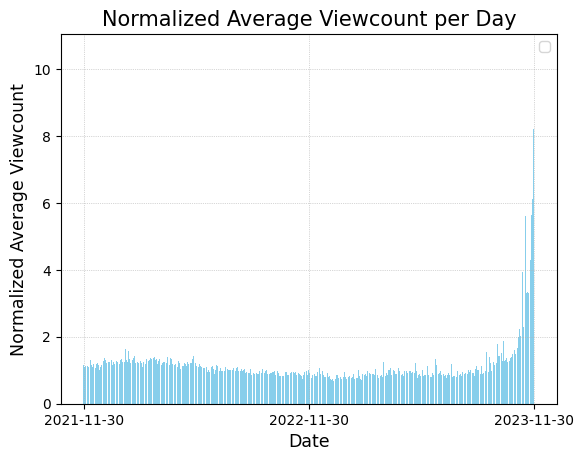

In [41]:
fig, ax = plt.subplots()


ax.bar(df_grp_viewcnt['dt']
        ,  df_grp_viewcnt['norm_viewcount']
        ,  color = 'skyblue'
        # ,  edgecolor = 'black'
      ) # hist type
ax.set_title('Normalized Average Viewcount per Day', fontsize = 15) # title
ax.set_xlabel('Date', fontsize = 12.5) # x-axis label
ax.set_ylabel('Normalized Average Viewcount', fontsize = 12.5) # y-axis label
ax.set_xticks(['2021-11-30', '2022-11-30','2023-11-30'])
# ax.set_xticks(['2020-11', '2021-11', '2022-11'])

ax.legend(loc = 'upper right', fontsize = 10) # add legend

ax.grid(True, linestyle = ':', linewidth = 0.5) # grid

plt.show();